# 3. 카메라 스티커앱 만들기 첫걸음

**face detection 기술, 이미지 처리기법 등 Computer Vision 분야의 실용적인 기술 활용법을 알아보고, SNOW 같은 재밌는 얼굴 인식 스티커 앱을 만들어봅시다.**

---

## 목차
- Step 1. 스티커 구하기 or 만들기
  - (1) 고양이 수염 이미지를 다운로드
  - (2) 셀카 이미지도 촬영
- Step 2. 얼굴 검출 & 랜드마크 검출 하기
  - 라이브러리 dlib 사용
  - 얼굴의 bounding box 위치와 landmark의 위치 찾기
- Step 3. 스티커 적용 위치 확인하기
  - ![sticker_2](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png)
- Step 4. 스티커 적용하기
  - (1) np.where 를 사용해서 스티커 적용
  - (2) 스티커 뒤로 원본 이미지가 같이 보이게 만들기: opencv 의 cv2.addWeighted() 사용
- Step 5. 문제점 찾아보기
  - (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용
  - (2) 문제점이 무엇인지 기록
    - 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
    - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
    - 실행 속도가 중요할까요?
    - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

---

## 3-6. 프로젝트: 고양이 수염 스티커 만들기

### Step 1. 스티커 구하기 or 만들기

[![cat-whiskers.png](https://cdn-icons-png.flaticon.com/512/24/24674.png)](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

### Step 2. 얼굴 검출 & 랜드마크 검출 하기

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [746]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib  # cf. 아나콘다 dlib 설치: conda install -c conda-forge dlib

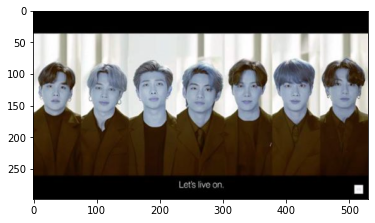

In [747]:
# 이미지 읽기
my_image_path = 'camera_sticker/images/BTS_1.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

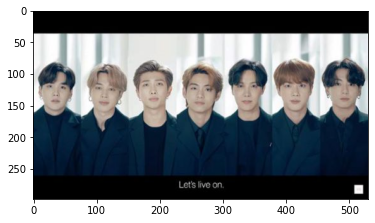

In [748]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기

고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

코 끝인 33 번보다 좋은 위치가 있을 거예요.

In [749]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()  # cf. hog detecter 사용
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(314, 107) (366, 159)], [(164, 101) (216, 153)], [(239, 107) (291, 159)], [(93, 113) (136, 156)], [(8, 107) (60, 159)], [(389, 107) (440, 159)], [(472, 108) (516, 151)]]


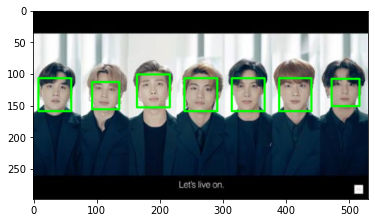

In [750]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [751]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [752]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# for i in range(len(list_landmarks)):
#   print(i, list_landmarks[i])

68


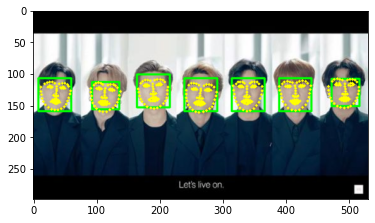

In [753]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 4. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

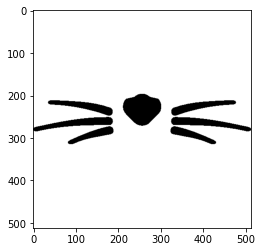

In [754]:
# 이미지 읽기
sticker_path = 'camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)    # OpenCV로 이미지를 불러옵니다
plt.imshow(img_sticker)
plt.show()

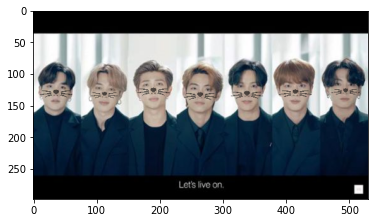

In [755]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  # print (landmark[30]) # 코의 index는 30 입니다
  x = landmark[30][0]
  y = landmark[30][1]
  w = h = dlib_rect.width()
  # print ('(x,y) : (%d,%d)'%(x,y))
  # print ('(w,h) : (%d,%d)'%(w,h))


  refined_x = x - w // 2
  refined_y = y - h // 2
  # print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
  # print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
  img_sticker = cv2.resize(img_sticker, (w,h))
  # print (img_sticker.shape)


  alpha = 0.4  # 투명도
  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, alpha, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 1-alpha, 0)  # 컬러 값 0(검정색)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()

### Step 5. 문제점 찾아보기

#### (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

In [756]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib  # cf. 아나콘다 dlib 설치: conda install -c conda-forge dlib

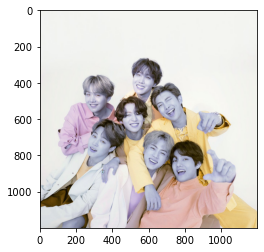

In [757]:
# 이미지 읽기
my_image_path = 'camera_sticker/images/BTS_2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

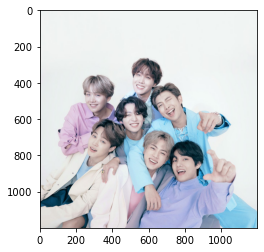

In [758]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [759]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()  # cf. hog detecter 사용
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(569, 741) (698, 870)], [(640, 469) (769, 598)], [(225, 426) (354, 555)], [(700, 769) (855, 924)], [(239, 669) (368, 798)], [(497, 325) (626, 454)], [(454, 540) (583, 669)]]


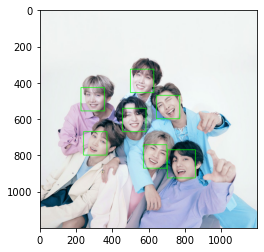

In [760]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [762]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [763]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# for i in range(len(list_landmarks)):
#     print(i, list_landmarks[i])

68


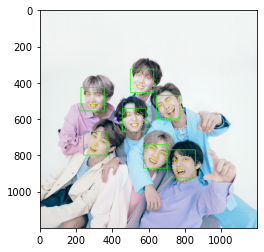

In [764]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

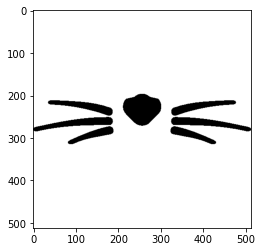

In [765]:
# 이미지 읽기
sticker_path = 'camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)    # OpenCV로 이미지를 불러옵니다
plt.imshow(img_sticker)
plt.show()

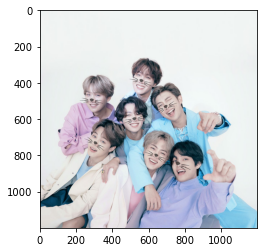

In [766]:
import math


# 각도 구하기
# math.atan2(dy, dx)로 하니까 고양이 수염이 제대로 안 붙음...
# => tan_theta = dx/dy; theta = np.arctan(tan_theta) 으로 해결
def getAngle(start, end):
  dx = end[0]-start[0]
  dy = end[1]-start[1]

  tan_theta = dx/dy
  theta = np.arctan(tan_theta)
  
  degree = theta * (180.0 / math.pi)  # radian to degree

  return degree


# 이미지 회전
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  # image_center = imgae[0], image[1] # ?? 좀 더 생각해봐야 함
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  # print (landmark[30]) # 코의 index는 30 입니다
  x = landmark[30][0]
  y = landmark[30][1]
  w = h = dlib_rect.width()
  # print ('(x,y) : (%d,%d)'%(x,y))
  # print ('(w,h) : (%d,%d)'%(w,h))


  refined_x = x - w // 2
  refined_y = y - h // 2
  # print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
  # print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
  img_sticker = cv2.resize(img_sticker, (w,h))
  # print (img_sticker.shape)


  start = landmark[30]
  end = landmark[27]
  img_sticker = rotate_image(img_sticker, getAngle(start, end))


  alpha = 0.4  # 투명도
  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, alpha, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 1-alpha, 0)  # 컬러 값 0(검정색)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()

#### (2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

>오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

>- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
>- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
>- 실행 속도가 중요할까요?
>- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

- 얼굴 각도에 따라 스티커를 회전(rotate)시켜야 한다. 각도를 구하기 위해서 tanθ 값(dx/dy)을 구했고 역 탄젠트 함수(numpy.arctan(tanθ))를 통해 θ 값을 알아냈다. θ는 radian이므로 180/math.pi 를 곱해서 degree 값을 얻는다. 얻어낸 degree 로 회전시키면 끝이 난다. 구글링의 승리!
- 너무 멀리서 촬영하면 얼굴 윤곽과 이목구비를 또렷하게 잡을 수가 없어서 인식이 안 된다. 옆으로 누운 자세 또한 마찬가지이다. 너무 가까워도 제대로 작동하지 않았음을 확인했다. 그 말은 곧, 이목구비와 윤곽만 제대로 잡힌다면 스티커를 붙일 수 있다는 말이 된다.
- 실행 속도가 빨라야 사용자가 해당 서비스를 계속 사용할 수 있다. 실행 속도가 느리면 오류가 발생한 것인지, 아직 돌아가고 있는지 알 수 없다. 다른 스티커로 바꿀 때에도 느리다면 당장 그 스티커앱은 휴지통에 들어갈 것이다.
- 엄청난 정교함을 요구하는 작업은 아니라서 정확도가 어느 정도 떨어져도 상관없다. 하지만 아무래도 정확할수록 더 좋다. 엉뚱한 곳에 스티커가 붙는다면 겁 많은 사람은 기절할 수도 있다.

---

# 회고

### - 이번 프로젝트에서 **어려웠던 점**.
얼굴 각도를 구하는 것과 openCV 라이브러리를 활용한 이미지 회전 및 투명도를 조절하는 것이 어려웠다. 라이브러리에 대한 이해도가 없었기에 그럴 수밖에 없다.

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
1. openCV는 image를 BGR로 load하므로 RGB로 변환해야 한다.
1. 두 점 사이 각도를 구할 때는 tanθ(=dx/dy)를 사용한다.
2. θ는 radian 이므로 값을 사용하고 싶다면 180/PI를 곱해서 degree로 변환해야 한다.
3. 투명도를 적용하려면 numpy.addWeighted(img1, alpha, img2, 1-alpha, 0) 함수를 사용한다.

### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

>#### **루브릭**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1|자기만의 카메라앱 기능 구현을 완수하였다.|원본에 스티커 사진이 정상적으로 합성되었다.|
>|2|스티커 이미지를 정확한 원본 위치에 반영하였다.|정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.|
>|3|카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.|

이미지 위치를 잡기 위해 x, y 값을 여러 번 조정했다. 정직하게 정면으로 얼굴이 나온 사진은 괜찮았으나 측면 얼굴이 보이게 찍힌 사진은 그에 맞게 각도를 구해서 스티커를 회전시켜야 했다. 각도를 구할 때 landmark 의 27번과 30번을 활용했고 코드 참고는 구글링으로 해결했다.

아이돌 그룹 BTS 사진으로 여러 번 코드를 돌려봤다. 확실하게 얼굴 윤곽과 이목구비가 찍힌 사진은 인식을 했다. 인식하지 못하는 경우는 다음과 같다. 너무 가깝거나 멀리 있는 사람, 모자쓴 사람, 제스처로 얼굴이 가려진 사람, 고개 각도가 너무 치우쳐진 사람 등이 있었다. 이미지 밝기는 중요하지 않은 것으로 보인다. 어두운 흑백 사진 여러 개를 돌려봤는데 딱히 영향이 없었다. '얼굴 윤곽/이목구비가 제대로 나왔는가'로 결정된다.

### - 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
없음

### - **자기 다짐**
openCV 라이브러리에 대한 숙련도를 쌓아야 된다. 잊어버린 수학 지식을 되찾아야 할 필요성이 느껴졌다.